In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.simplefilter('ignore')


In [2]:
df = pd.read_excel('absenteeism_at_work.xls')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
#identifying the null values
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [4]:
print(df.shape)

# drop rows where values are zero
df = df[df['Age'] > 0]
df = df[df['Reason for absence'] > 0]
df = df[df['Month of absence'] > 0]
df = df[df['Height'] > 0]
df = df[df['Weight'] > 0]
df = df[df['Absenteeism time in hours']>0]
df.dropna()

print(df.shape)

(740, 21)
(696, 21)


In [5]:
#EDA

linebreak = '------------------' 

#Check Shape
print(linebreak*3)
print("Shape: ")
print(df.shape)
print(linebreak*3)
    
#Check Feature Names
print("Column Names: ")
print(df.columns)
print(linebreak*3)
    
#Check types, missing, memory
print("Data Types, Missing Data, Memory: ")
print(df.info())
print(linebreak*3)

------------------------------------------------------
Shape: 
(696, 21)
------------------------------------------------------
Column Names: 
Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')
------------------------------------------------------
Data Types, Missing Data, Memory: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 736
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               696 non-null    int64
 1   Reason for absence               696 non-null    int64
 

In [6]:
#to find the correlation between the values and y
corr = df.corr()
print(corr['Absenteeism time in hours'])

ID                                -0.017577
Reason for absence                -0.300813
Month of absence                   0.033875
Day of the week                   -0.130839
Seasons                            0.012429
Transportation expense             0.040808
Distance from Residence to Work   -0.099886
Service time                       0.019654
Age                                0.086038
Work load Average/day              0.030206
Hit target                         0.009171
Disciplinary failure                    NaN
Education                         -0.056083
Son                                0.127683
Social drinker                     0.073874
Social smoker                      0.005242
Pet                               -0.022864
Weight                             0.028674
Height                             0.147385
Body mass index                   -0.039468
Absenteeism time in hours          1.000000
Name: Absenteeism time in hours, dtype: float64


In [7]:
#dropping values that have a high correlation with one another or a very low correlation with y
df1 = df.drop(['ID', 'Disciplinary failure', 'Weight', 'Age', 'Height'],axis=1)
df1

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,239554,97,1,2,1,0,1,30,4
2,23,7,4,1,179,51,18,239554,97,1,0,1,0,0,31,2
3,7,7,5,1,279,5,14,239554,97,1,2,1,1,0,24,4
4,23,7,5,1,289,36,13,239554,97,1,2,1,0,1,30,2
5,23,7,6,1,179,51,18,239554,97,1,0,1,0,0,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,22,7,4,1,361,52,3,264604,93,1,1,1,0,4,27,8
733,22,7,4,1,225,26,9,264604,93,1,1,0,0,2,24,8
734,13,7,2,1,369,17,12,264604,93,1,3,1,0,0,25,80
735,14,7,3,1,289,36,13,264604,93,1,2,1,0,1,30,8


In [8]:
#standardizing the data
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# separate the independent and dependent variables
y = df1.iloc[:,-1]
X = df1.iloc[:,:-1]

# standardization of dependent variables
scaled_X = scale.fit_transform(X)
print(scaled_X)

[[ 0.7834584   0.2126796  -0.64417491 ... -0.26602487  0.21202429
   0.81786012]
 [ 0.36432923  0.2126796   0.05527242 ... -0.26602487 -0.56876356
   1.05653125]
 [-1.87102632  0.2126796   0.75471975 ...  3.75904706 -0.56876356
  -0.61416665]
 ...
 [-1.03276799  0.2126796  -1.34362224 ... -0.26602487 -0.56876356
  -0.37549553]
 [-0.89305827  0.2126796  -0.64417491 ... -0.26602487  0.21202429
   0.81786012]
 [-1.31218743  0.2126796  -0.64417491 ... -0.26602487  0.21202429
   0.57918899]]


In [9]:
#to create train and test split, then KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

max_at_state = 0
max_accuracy = 0

for r in range(43):
    x_train,x_test,y_train,y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=r)
    knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
    #predicting y for x_test
    y_knnpredict = knn.predict(x_test)
    accuracy_knn = accuracy_score(y_knnpredict,y_test)

    if max_accuracy < accuracy_knn:
        max_at_state = r
        max_accuracy = accuracy_knn

print(f"Max accuracy is at random state {max_at_state}, with an accuracy of {max_accuracy * 100:.2f}%")

Max accuracy is at random state 33, with an accuracy of 45.71%


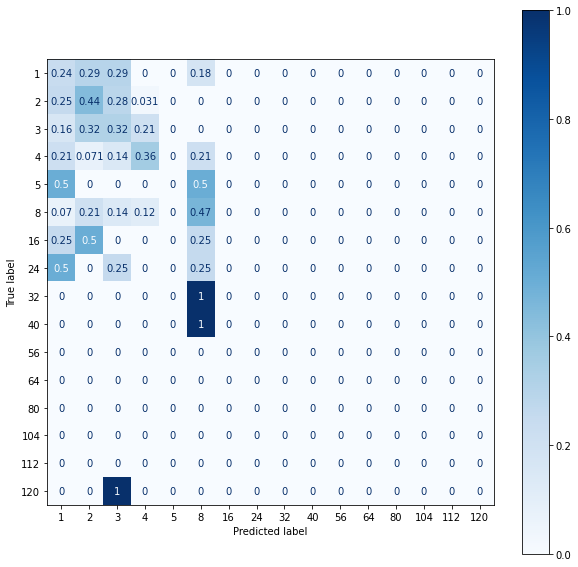

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_knnpredict, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_,)
disp.plot(cmap = plt.cm.Blues)
plt.rcParams['figure.figsize'] = [10, 10]

SVM and Perceptron

Q. Use the perceptron first and SVM second to predict the social drinking status.

In [14]:
#Shifting social drinker column to the front
first_column = df.pop('Social drinker')
df.insert(0, 'Social drinker', first_column)
print()
print("After Shifting 'Social Drinker' to first position")
display(df)


After Shifting 'Social Drinker' to first position


,Social drinker,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Hit target,Disciplinary failure,Education,Son,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,11,26,7,3,1,289,36,13,33,...,97,0,1,2,0,1,90,172,30,4
2,1,3,23,7,4,1,179,51,18,38,...,97,0,1,0,0,0,89,170,31,2
3,1,7,7,7,5,1,279,5,14,39,...,97,0,1,2,1,0,68,168,24,4
4,1,11,23,7,5,1,289,36,13,33,...,97,0,1,2,0,1,90,172,30,2
5,1,3,23,7,6,1,179,51,18,38,...,97,0,1,0,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,1,10,22,7,4,1,361,52,3,28,...,93,0,1,1,0,4,80,172,27,8
733,0,28,22,7,4,1,225,26,9,28,...,93,0,1,1,0,2,69,169,24,8
734,1,13,13,7,2,1,369,17,12,31,...,93,0,1,3,0,0,70,169,25,80
735,1,11,14,7,3,1,289,36,13,33,...,93,0,1,2,0,1,90,172,30,8


In [15]:
#to find correlation with social drinker
corr = df.corr()
print(corr['Social drinker'])

Social drinker                     1.000000
ID                                -0.469789
Reason for absence                 0.121221
Month of absence                   0.042514
Day of the week                    0.038277
Seasons                           -0.050597
Transportation expense             0.174328
Distance from Residence to Work    0.485190
Service time                       0.346365
Age                                0.214618
Work load Average/day             -0.016247
Hit target                        -0.082788
Disciplinary failure                    NaN
Education                         -0.420485
Son                                0.200566
Social smoker                     -0.103058
Pet                               -0.105866
Weight                             0.382681
Height                             0.185338
Body mass index                    0.322655
Absenteeism time in hours          0.073874
Name: Social drinker, dtype: float64


In [16]:
#dropping values that have a high correlation with one another or a very low correlation with y
df2 = df.drop(['ID', 'Disciplinary failure','Education'], axis=1)

In [17]:
y = df2.iloc[:,0]
x = df2.iloc[:,1:]

In [18]:
#standardizing the data
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of dependent variables
scaled_x = scale.fit_transform(x)
print(scaled_x)

[[ 0.7834584   0.2126796  -0.64417491 ... -0.02173097  0.81786012
  -0.24686927]
 [ 0.36432923  0.2126796   0.05527242 ... -0.35052997  1.05653125
  -0.39372483]
 [-1.87102632  0.2126796   0.75471975 ... -0.67932897 -0.61416665
  -0.24686927]
 ...
 [-1.03276799  0.2126796  -1.34362224 ... -0.51492947 -0.37549553
   5.33364214]
 [-0.89305827  0.2126796  -0.64417491 ... -0.02173097  0.81786012
   0.04684186]
 [-1.31218743  0.2126796  -0.64417491 ... -0.02173097  0.57918899
  -0.24686927]]


In [19]:
#to create train and test split

x_train,x_test,y_train,y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=0)

In [20]:
#Using Perceptron to predict the social drinking status

from sklearn.linear_model import Perceptron

max_at_state = 0
max_accuracy = 0

for r in range(43):
    perc = Perceptron(tol=0.01, random_state=r).fit(x_train,y_train)
    percpredict = perc.predict(x_test)
    percaccuracy = accuracy_score(percpredict,y_test)

    if max_accuracy<percaccuracy:
        max_at_state = r
        max_accuracy = percaccuracy
print(f"At random state {max_at_state}, there is maximum accuracy of {max_accuracy*100:.2f}%")

At random state 10, there is maximum accuracy of 92.86%


The accuracy of the Perceptron for social drinking status is 92.86%

In [21]:
#Using SVM to predict the social drinking status

from sklearn.svm import SVC 
svc = SVC(gamma='auto').fit(x_train, y_train)

In [22]:
svcpredict = svc.predict(x_test) 

In [23]:
svcaccuracy = accuracy_score(svcpredict,y_test)
print(svcaccuracy)

1.0


The accuracy of the SVM for social drinking status is 100%